In [3]:
pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aastikmishra03
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images


100%|██████████| 1.68G/1.68G [00:12<00:00, 140MB/s]


In [7]:
import os

# List the contents of the downloaded dataset directory
dataset_path = "./deepfake-and-real-images"
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
./deepfake-and-real-images/Dataset/Train/Real/real_46023.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_54736.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_55424.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_18836.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_57151.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_49956.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_36511.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_52568.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_19600.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_6923.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_36569.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_18205.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_19866.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_581.jpg
./deepfake-and-real-images/Dataset/Train/Real/real_67397.jpg
./deepfake-and-real-images/Dataset/Tr

# Task
Load the image data and labels, preprocess the data, build and train a CNN model for image classification, evaluate the model, and make predictions.

## Load and preprocess data

### Subtask:
Load the images and their corresponding labels, preprocess the data, and split the data into training, validation, and test sets.


**Reasoning**:
Import the necessary libraries and define the dataset path.



In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

dataset_path = "./deepfake-and-real-images/Dataset"

**Reasoning**:
Create image data generators for training, validation, and test sets, specifying image size, batch size, and class mode.



In [17]:
image_size = (128, 128)
batch_size = 32
seed = 42

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Splitting training data for validation
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=seed)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=seed)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    seed=seed)

Found 112002 images belonging to 2 classes.
Found 28000 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


## Build the model

### Subtask:
Define the architecture of a deep learning model suitable for image classification, such as a Convolutional Neural Network (CNN).


**Reasoning**:
Define the architecture of a CNN model using Keras Sequential API for binary image classification.



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Task
Use pre-trained models and data augmentation to build and train an image classification model.

## Load and preprocess data

### Subtask:
Load the images and their corresponding labels, preprocess the data, and split the data into training, validation, and test sets. Incorporate data augmentation techniques to increase the size and diversity of the training dataset.


**Reasoning**:
Modify the existing code cell to include data augmentation parameters in the training data generator.



In [19]:
image_size = (128, 128)
batch_size = 32
seed = 42

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=seed)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=seed)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    seed=seed)

Found 112002 images belonging to 2 classes.
Found 28000 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


## Build the model

### Subtask:
Define the architecture of a deep learning model suitable for image classification, such as a Convolutional Neural Network (CNN). Use a pre-trained model as a base for the CNN.


**Reasoning**:
Define the architecture of a CNN model using a pre-trained VGG16 model as the base for binary image classification.



In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(image_size[0], image_size[1], 3),
                   include_top=False,
                   weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Lstm(150)
    Dense(1, activation='sigmoid')
])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and evaluation metrics.


**Reasoning**:
Compile the model with the specified optimizer, loss function, and metrics.



In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the model using the training data and validate its performance using the validation data.


**Reasoning**:
Train the compiled model using the training data and validate its performance using the validation data, storing the training history.



In [24]:
epochs = 2

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/2
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 738s 211ms/step - accuracy: 0.7717 - loss: 0.4676 - val_accuracy: 0.7882 - val_loss: 0.4348
Epoch 2/2
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 141s 40ms/step - accuracy: 0.6562 - loss: 0.4792 - val_accuracy: 0.7864 - val_loss: 0.4372


## Evaluate the model

### Subtask:
Evaluate the trained model on the test data to assess its performance on unseen data.


**Reasoning**:
Evaluate the trained model on the test data and print the results.



In [25]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.7384 - loss: 0.5117
Test Loss: 0.5030
Test Accuracy: 0.7387


## Make predictions

### Subtask:
Use the trained model to make predictions on new images.


**Reasoning**:
Load and preprocess a few images from the test set to make predictions.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


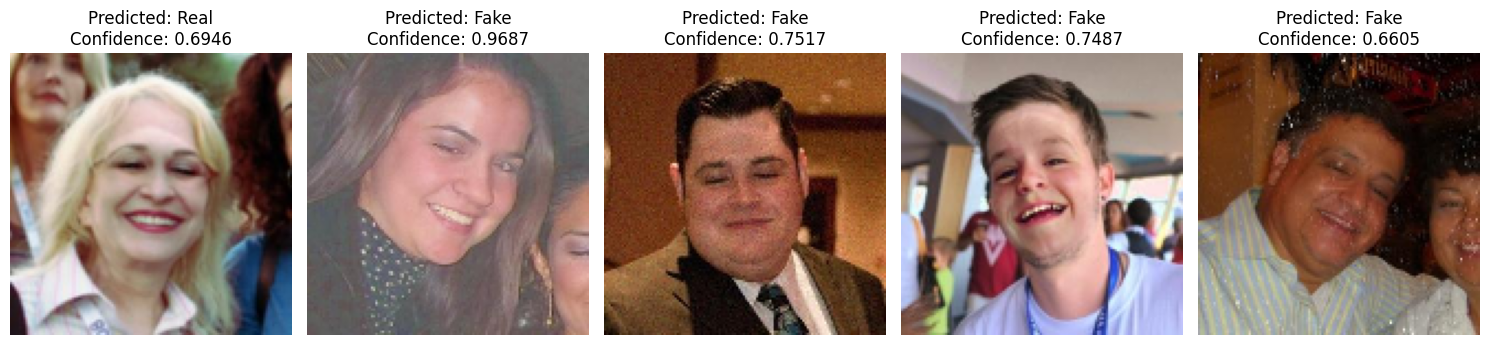

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Get some image paths from the test generator
test_image_paths = [os.path.join(dataset_path, 'Test', label, img)
                    for label in os.listdir(os.path.join(dataset_path, 'Test'))
                    for img in os.listdir(os.path.join(dataset_path, 'Test', label))][:5] # Take first 5 images

# Preprocess the images
processed_images = []
for img_path in test_image_paths:
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values
    processed_images.append(img_array)

# Concatenate the preprocessed images
processed_images = np.vstack(processed_images)

# Make predictions
predictions = model.predict(processed_images)

# Interpret predictions and display images
class_labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(15, 5))
for i in range(len(test_image_paths)):
    plt.subplot(1, len(test_image_paths), i + 1)
    img = image.load_img(test_image_paths[i], target_size=image_size)
    plt.imshow(img)
    predicted_class_index = int(np.round(predictions[i][0]))
    predicted_label = class_labels[predicted_class_index]
    confidence = predictions[i][0] if predicted_class_index == 1 else (1 - predictions[i][0])
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.4f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Save the model

### Subtask:
Save the trained model to disk.

**Reasoning**:
Save the trained model to a file in the HDF5 format.

In [27]:
model.save('deepfake_detector_model4.h5')
print("Model saved successfully!")

Model saved successfully!
